In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('us_accident_data.csv')

In [3]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,12-06-2019 10:10,12-06-2019 10:55,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,37:14.0,56:53.0,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,13:00.0,22:45.0,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,21-02-2022 17:43,21-02-2022 19:43,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,04-12-2020 01:46,04-12-2020 04:13,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
# Data Cleaning, we'll drop rows with missing values.
data.dropna(inplace=True)

In [5]:
data.shape

(229927, 46)

In [6]:
# Convert Start_Time and End_Time to datetime objects
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [7]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1,A-4694324,Source1,2,NaT,NaT,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,NaT,NaT,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,NaT,NaT,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,NaT,NaT,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
6,A-7222249,Source1,2,NaT,NaT,42.421280,-123.119450,42.421280,-123.119450,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
data.shape

(229927, 46)

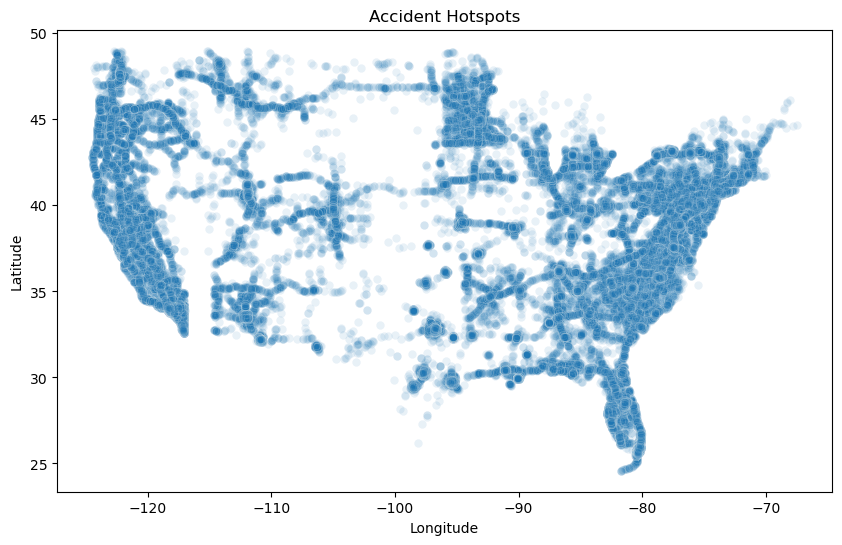

In [9]:
# Accident hotspots visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=data, alpha=0.1)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

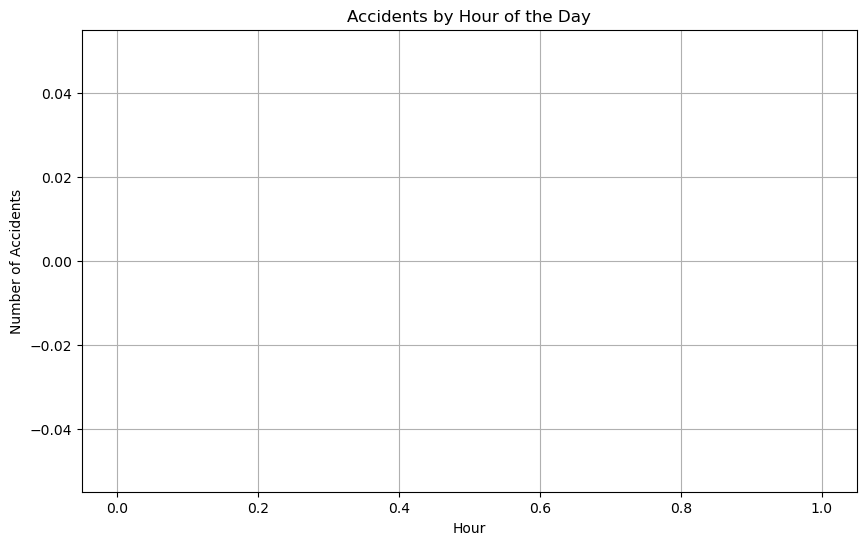

In [13]:
# Distribution of accidents over time
plt.figure(figsize=(10, 6))
data['Start_Time'].dt.hour.hist(bins=24, color='teal')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

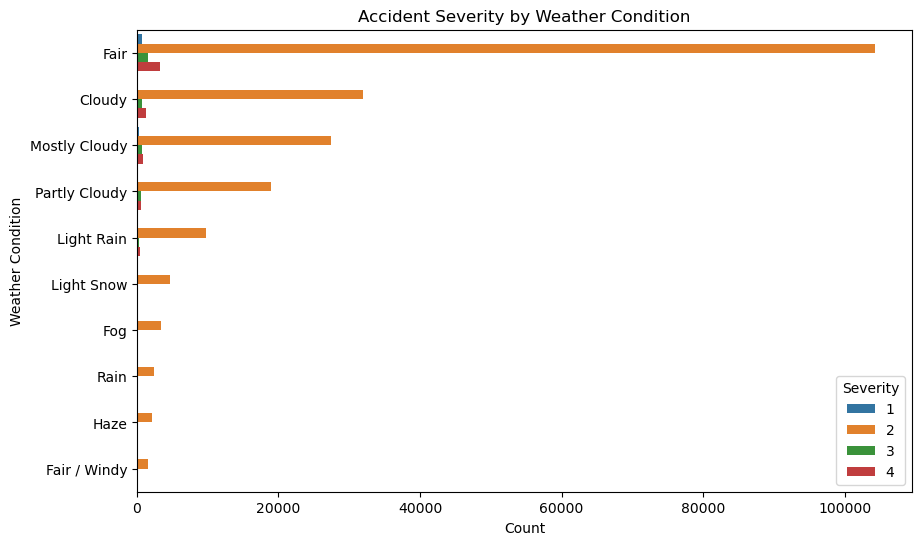

In [11]:
# Relationship between weather condition and accident severity
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Condition', hue='Severity', data=data, order=data['Weather_Condition'].value_counts().iloc[:10].index)
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.show()

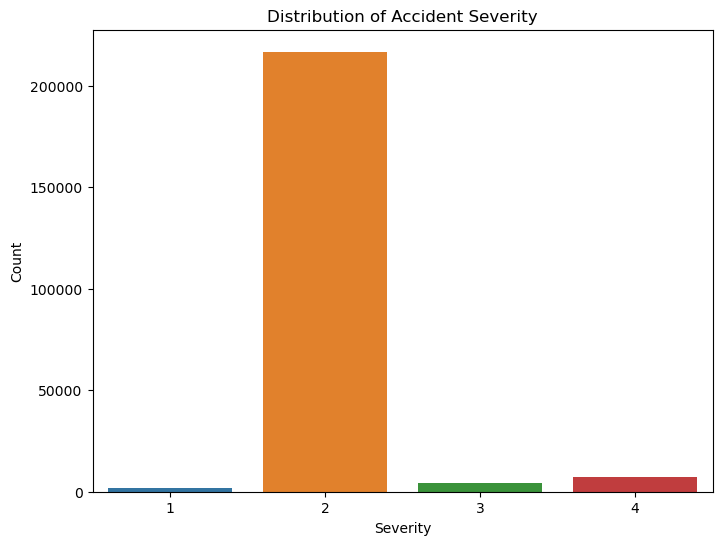

In [14]:
# Distribution of accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=data)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()